In [1]:
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
DATA_IN_PATH = './data_in/'
print('파일 크기: ')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        fsize = round(os.path.getsize(DATA_IN_PATH + file)/1000000, 2)
        file_unit = str(fsize) + 'MB'
        print(file.ljust(30)+ file_unit)

파일 크기: 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [3]:
train_fname = DATA_IN_PATH + 'ratings_train.txt'
train_data = pd.read_csv(train_fname, header=0, delimiter='\t', quoting=csv.QUOTE_NONE)
# quoting 옵션은 csv파일을 dataframe으로 바꿀 때 따옴표(")는 무시하겠다는 뜻.
# ratings.txt 파일에는 따옴표는 없음. naver에서 말뭉치로 바꾸면서 모두 없앤 것으로 보임.

In [5]:
train_data.head(10) # 상위 10개 데이터 출력
#train_data.shape
#train_data.info()
#train_data["document"][:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [6]:
print('train data 수:{}'.format(len(train_data))) 

train data 수:150000


In [7]:
f = lambda x: len(x) # document 길이 확인
train_length = train_data['document'].astype(str).apply(f)
train_length.head(10)
#train_length.sort_values(ascending=False)

0    19
1    33
2    17
3    29
4    61
5    45
6    21
7    86
8    22
9    45
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

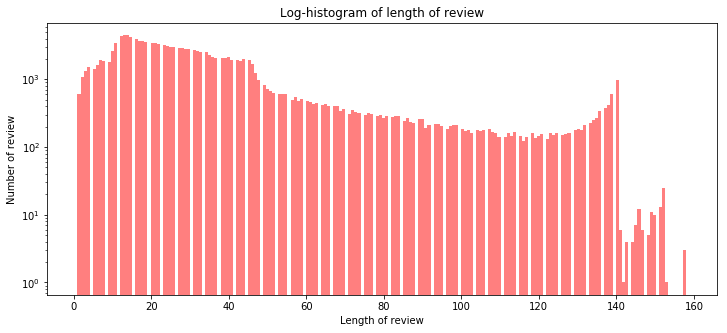

In [8]:
plt.figure(figsize=(12,5)) #document 길이에 따른 리뷰 개수가 크기 때문에 log로 표현
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [9]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 158
리뷰 길이 최소값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x4161a0cd68>,
 'caps': [<matplotlib.lines.Line2D at 0x4161a24438>,
 'boxes': [<matplotlib.lines.Line2D at 0x4161a0c908>],
 'medians': [<matplotlib.lines.Line2D at 0x4161a24ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x4161a24eb8>],
 'means': [<matplotlib.lines.Line2D at 0x4161a24e10>]}

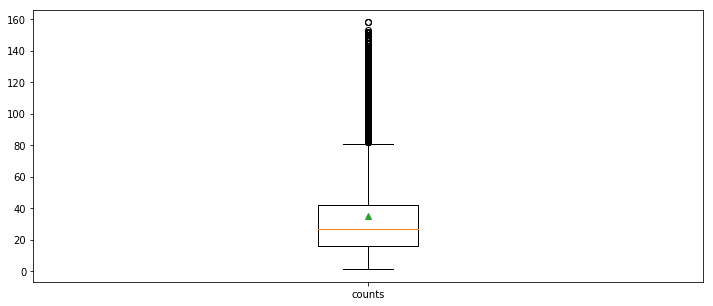

In [10]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [11]:
train_review = [review for review in train_data['document'] if type(review) is str] #train_review에 document들을 string 형태로 넣음
#train_review[:2]

In [12]:
hangul_ttf = DATA_IN_PATH + 'NanumGothic.ttf'  #글꼴 지정
wordcloud = WordCloud(font_path=hangul_ttf).generate(' '.join(train_review)) #글꼴 및 데이터 삽입

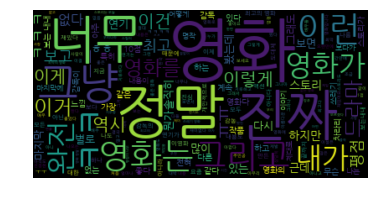

In [13]:
plt.imshow(wordcloud, interpolation='bilinear') #interpolation='bilinear'은 데이터 위치가 직사각형을 이룰 때, 즉 1차원이 아닌 2차원일 때 사용
plt.axis('off') # 축 없애기
plt.show()

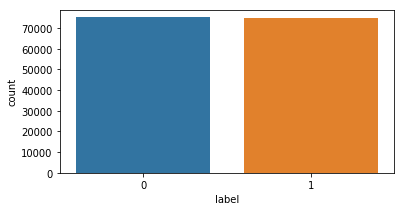

In [14]:
fig, axe = plt.subplots(ncols=1) #레이블 비율 막대 그래프로 확인하기
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [15]:
neg_review = train_data['label'].value_counts()[0] #레이블 비율 개수 숫자로 확인하기
pos_review = train_data['label'].value_counts()[1]
print('긍정 리뷰 개수:{}'.format(pos_review))
print('부정 리뷰 개수:{}'.format(neg_review))

긍정 리뷰 개수:74827
부정 리뷰 개수:75173


In [16]:
fsplit = lambda x: len(x.split(' '))
train_word_counts = train_data['document'].astype(str).apply(fsplit)

Text(0, 0.5, 'Number of reviews')

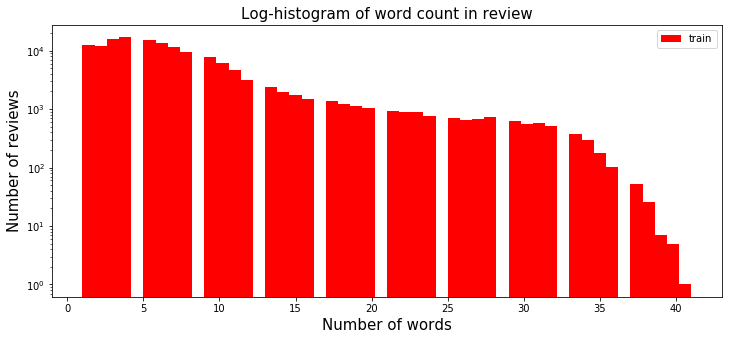

In [17]:
plt.figure(figsize=(12,5))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [18]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최소값: 1
리뷰 단어 개수 평균값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 3.0
리뷰 단어 개수 제3사분위: 9.0


In [19]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x:'?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x:'.' in x))

In [20]:
print('물음표가 있는 질문:{:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문:{:.2f}%'.format(fullstop * 100))

물음표가 있는 질문:8.25%
마침표가 있는 질문:51.76%
